In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [3]:
# Read data
trainData = pd.read_table("/Users/stevenzhai/Desktop/FTE4560/fillTrain.csv", sep=",")
trainDX = trainData[trainData.columns.values[:-1]]
trainDY = trainData[["class"]]

testData = pd.read_table("/Users/stevenzhai/Desktop/FTE4560/fillTest.csv", sep=",")
testDX = testData[testData.columns.values[:-1]]
testDY = testData[["class"]]

In [4]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(trainDX,trainDY)
train_predict = clf.predict(trainDX)
train_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [5]:
clf.tree_.max_depth

14

In [6]:
test_predict = clf.predict(testDX)
test_predict

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0])

In [7]:
trainDY = np.array(trainDY)
testDY = np.array(testDY)

In [8]:
#Compute the training accuracy, precision, recall and F1-score
TP_train = 0
TN_train = 0
FP_train = 0
FN_train = 0
for i in range(len(train_predict)):
    if (train_predict[i] == 0 and trainDY[i] == 0):
        TN_train += 1
    elif (train_predict[i] == 1 and trainDY[i] == 1):
        TP_train += 1
    elif (train_predict[i] == 1 and trainDY[i] == 0):
        FP_train += 1
    else:
        FN_train += 1
Accuracy_train = (TP_train+TN_train)/(TP_train+TN_train+FP_train+FN_train)
Precision_train = TP_train/(TP_train + FP_train)
Recall_train = TP_train/(TP_train + FN_train)
F1_train = 2*Precision_train*Recall_train/(Precision_train + Recall_train)

#Compute the testing accuracy, precision, recall and F1-score
TP_test = 0
TN_test = 0
FP_test = 0
FN_test = 0
for i in range(len(test_predict)):
    if (test_predict[i] == 0 and testDY[i] == 0):
        TN_test += 1
    elif (test_predict[i] == 1 and testDY[i] == 1):
        TP_test += 1
    elif (test_predict[i] == 1 and testDY[i] == 0):
        FP_test += 1
    else:
        FN_test += 1
Accuracy_test = (TP_test+TN_test)/(TP_test+TN_test+FP_test+FN_test)
Precision_test = TP_test/(TP_test + FP_test)
Recall_test = TP_test/(TP_test + FN_test)
F1_test = 2*Precision_test*Recall_test/(Precision_test + Recall_test)

In [9]:
print(Accuracy_train,Precision_train,Recall_train,F1_train,Accuracy_test,Precision_test,Recall_test,F1_test)

1.0 1.0 1.0 1.0 0.7880794701986755 0.7209302325581395 0.6078431372549019 0.6595744680851063


In [10]:
def tree(para):
    np.random.seed(4)
    train_acc = []
    train_pre = []
    train_rec = []
    train_f1 = []
    test_acc = []
    test_pre = []
    test_rec = []
    test_f1 = []
    for i in range(1,para): 
        clf = DecisionTreeClassifier(max_depth=para,)
        clf = clf.fit(trainDX,trainDY)
        train_predict = clf.predict(trainDX)
        test_predict = clf.predict(testDX)
        #Compute the training accuracy, precision, recall and F1-score
        TP_train = 0
        TN_train = 0
        FP_train = 0
        FN_train = 0
        for i in range(len(train_predict)):
            if (train_predict[i] == 0 and trainDY[i] == 0):
                TN_train += 1
            elif (train_predict[i] == 1 and trainDY[i] == 1):
                TP_train += 1
            elif (train_predict[i] == 1 and trainDY[i] == 0):
                FP_train += 1
            else:
                FN_train += 1
        Accuracy_train = (TP_train+TN_train)/(TP_train+TN_train+FP_train+FN_train)
        Precision_train = TP_train/(TP_train + FP_train)
        Recall_train = TP_train/(TP_train + FN_train)
        F1_train = 2*Precision_train*Recall_train/(Precision_train + Recall_train)
        train_acc.append(Accuracy_train)
        train_pre.append(Precision_train)
        train_rec.append(Recall_train)
        train_f1.append(F1_train)
        #Compute the testing accuracy, precision, recall and F1-score
        TP_test = 0
        TN_test = 0
        FP_test = 0
        FN_test = 0
        for i in range(len(test_predict)):
            if (test_predict[i] == 0 and testDY[i] == 0):
                TN_test += 1
            elif (test_predict[i] == 1 and testDY[i] == 1):
                TP_test += 1
            elif (test_predict[i] == 1 and testDY[i] == 0):
                FP_test += 1
            else:
                FN_test += 1
        Accuracy_test = (TP_test+TN_test)/(TP_test+TN_test+FP_test+FN_test)
        Precision_test = TP_test/(TP_test + FP_test)
        Recall_test = TP_test/(TP_test + FN_test)
        F1_test = 2*Precision_test*Recall_test/(Precision_test + Recall_test)
        test_acc.append(Accuracy_test)
        test_pre.append(Precision_test)
        test_rec.append(Recall_test)
        test_f1.append(F1_test)
    return(train_acc,train_pre,train_rec,train_f1,test_acc,test_pre,test_rec,test_f1)

In [11]:
tree_t = tree(15)

In [12]:
tree_t

([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
 [0.7947019867549668,
  0.7880794701986755,
  0.8013245033112583,
  0.7814569536423841,
  0.7814569536423841,
  0.8013245033112583,
  0.7880794701986755,
  0.7947019867549668,
  0.8145695364238411,
  0.8145695364238411,
  0.7615894039735099,
  0.7814569536423841,
  0.7814569536423841,
  0.8013245033112583],
 [0.7380952380952381,
  0.7317073170731707,
  0.7441860465116279,
  0.7142857142857143,
  0.7142857142857143,
  0.7441860465116279,
  0.7209302325581395,
  0.7272727272727273,
  0.7674418604651163,
  0.7804878048780488,
  0.6923076923076923,
  0.725,
  0.75,
  0.7692307692307693],
 [0.6078431372549019,
  0.5882352941176471,
  0.6274509803921569,
  0.5882352941176471,
  0.5882352941176471,
  0.627

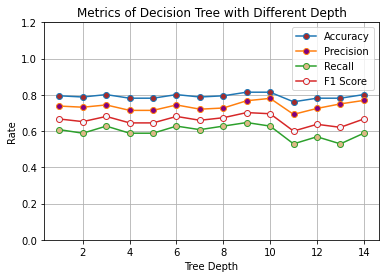

In [14]:
## fig = plt.figure()
plt.xlabel("Tree Depth")
plt.ylabel("Rate")
plt.grid()
plt.ylim(0,1.2)
plt.plot(range(1,15),tree_t[4],marker="o",markerfacecolor="brown",label="Accuracy")
plt.plot(range(1,15),tree_t[5],marker="o",markerfacecolor="purple",label="Precision")
plt.plot(range(1,15),tree_t[6],marker="o",markerfacecolor="burlywood",label="Recall")
plt.plot(range(1,15),tree_t[7],marker="o",markerfacecolor="aliceblue",label="F1 Score")
plt.title("Metrics of Decision Tree with Different Depth")
plt.legend()
plt.savefig("/Users/stevenzhai/Desktop/FTE4560/Decision_Tree_2.png")
plt.show()

In [39]:
clf = DecisionTreeClassifier(max_depth=10)
clf = clf.fit(trainDX,trainDY)
fig2 = plt.figure(figsize=(200, 100))
plot_tree(clf,fontsize=30)
plt.savefig("/Users/stevenzhai/Desktop/FTE4560/Decision_Tree.png")
plt.show()